In [30]:
%load_ext autoreload
%autoreload 2


##################################
# INPUT PARAMETERS:
##################################
sat_file = 'starlette'
arc = '030914_2wk'
grav_id ='goco05s' 
local_path = '/data/analysis/notebooks/starlette_analysis/'
SAT_ID = 7501001

##################################
# PATH TO DENSITY MODEL RUN of Choice:
##################################

msis86_model = 'msis86'
path_to_msis86 = '/data/runs_geodyn/st/results/'+ grav_id+'_'+msis86_model+'/'





In [31]:
import sys  
sys.path.insert(0, '/data/analysis/notebooks/util_funcs/py_starlette/')

from a_ReadStarlette import ReadStarlette

AdjustedParams, Trajectory, Density, Resids = ReadStarlette(arc, 
                                                           sat_file,
                                                           grav_id, 
                                                           local_path, 
                                                           path_to_msis86)

The base file name for this arc is: st030914_2wk.goco05s
File exists: iieout /data/runs_geodyn/st/results/goco05s_msis86/IIEOUT/st030914_2wk.goco05s
File exists: ascii_xyz /data/runs_geodyn/st/results/goco05s_msis86/XYZ_TRAJ/st030914_2wk.goco05s
File exists: densityfil /data/runs_geodyn/st/results/goco05s_msis86/DENSITY/st030914_2wk.goco05s
Loading data... 

Parameter adjustment data loaded
Trajectory data loaded
Density data loaded
Residual data loaded


,Elapsed Secs,YYMMDD,HHMMSS,Lat,Lon,Height (meters),rho (kg/m**3),delta_rho (kg/m**3/m),X,Y,...,YDOT,ZDOT,timeHHMMSS,year,month,day,hours,minutes,secs,Date
0,210.0,30914,434,45.6973,278.5740,1083058.594,1.623031e-15,0.0,182992.974,-5215697.130,...,-1841.620957,-1912.851416,000434,2003.0,9.0,14.0,0.0,4.0,34.0,2003-09-14 00:04:34
1,225.0,30914,449,45.3666,279.6052,1084271.860,1.606673e-15,0.0,284238.712,-5242756.035,...,-1766.174236,-1989.534319,000449,2003.0,9.0,14.0,0.0,4.0,49.0,2003-09-14 00:04:49
2,240.0,30914,504,45.0256,280.6232,1085455.504,1.590705e-15,0.0,385422.960,-5268680.634,...,-1690.382976,-2065.747643,000504,2003.0,9.0,14.0,0.0,5.0,4.0,2003-09-14 00:05:04
3,255.0,30914,519,44.6746,281.6279,1086609.356,1.575121e-15,0.0,486523.867,-5293465.880,...,-1614.263040,-2141.476196,000519,2003.0,9.0,14.0,0.0,5.0,19.0,2003-09-14 00:05:19
4,270.0,30914,534,44.3139,282.6193,1087733.252,1.559916e-15,0.0,587519.621,-5317106.961,...,-1537.830323,-2216.704901,000534,2003.0,9.0,14.0,0.0,5.0,34.0,2003-09-14 00:05:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161695,1219305.0,30928,24249,7.8594,222.1546,1094445.794,2.651811e-15,0.0,-121470.843,-7401788.003,...,-888.380399,-5433.552627,024249,2003.0,9.0,28.0,2.0,42.0,49.0,2003-09-28 02:42:49
161696,1219320.0,30928,24304,7.2238,222.6380,1095341.194,2.631081e-15,0.0,-50997.535,-7414316.911,...,-782.117225,-5447.575470,024304,2003.0,9.0,28.0,2.0,43.0,4.0,2003-09-28 02:43:04
161697,1219335.0,30928,24319,6.5877,223.1198,1096210.433,2.610683e-15,0.0,19486.731,-7425250.871,...,-675.724272,-5460.418794,024319,2003.0,9.0,28.0,2.0,43.0,19.0,2003-09-28 02:43:19
161698,1219350.0,30928,24334,5.9511,223.6001,1097053.364,2.590616e-15,0.0,89966.794,-7434588.100,...,-569.223327,-5472.080811,024334,2003.0,9.0,28.0,2.0,43.0,34.0,2003-09-28 02:43:34


In [51]:
points = 2000

lon = Density['Lon'].astype(float)[:points]
lat = Density['Lat'].astype(float)[:points]
alt = Density['Height (meters)'].astype(float)[:points]

x = Density['X'].astype(float)[:points]
y = Density['Y'].astype(float)[:points]
z = Density['Z'].astype(float)[:points]

In [53]:


import plotly.graph_objects as go
import numpy as np



fig = go.Figure(data=[go.Scatter3d(x=x,
                                   y=y,
                                   z=z,
                               mode='markers',
                                    marker=dict(
                                    size=2,
                                    opacity=0.5),
                                   ),
                                   ],
                                   )

fig.update_layout(
    title="3D Cartesian Orbit",
    xaxis_title="Lon",
    yaxis_title="Lon",
#     zaxis_title="z Coordinate",
    )
# tight layout
fig.show()


In [63]:
ccrs.

6378137.0

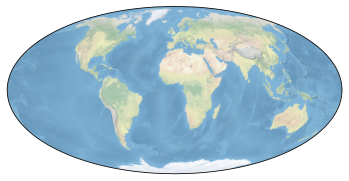

In [55]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()

In [35]:
# import cartopy.crs as ccrs
# import matplotlib.pyplot as plt

# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.stock_img()

# ny_lon, ny_lat = -75, 43
# delhi_lon, delhi_lat = 77.23, 28.61

# plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
#          color='blue', linewidth=2, marker='o',
#          transform=ccrs.Geodetic(),
#          )

# plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
#          color='gray', linestyle='--',
#          transform=ccrs.PlateCarree(),
#          )

# plt.text(ny_lon - 3, ny_lat - 12, 'New York',
#          horizontalalignment='right',
#          transform=ccrs.Geodetic())

# plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
#          horizontalalignment='left',
#          transform=ccrs.Geodetic())

# plt.show()

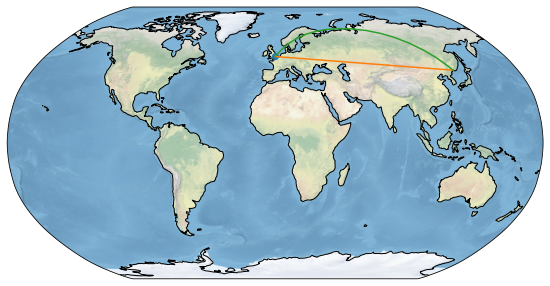

In [3]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs


def main():
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

    # make the map global rather than have it zoom in to
    # the extents of any plotted data
    ax.set_global()

    ax.stock_img()
    ax.coastlines()

    ax.plot(-0.08, 51.53, 'o', transform=ccrs.PlateCarree())
    ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.PlateCarree())
    ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.Geodetic())

    plt.show()


if __name__ == '__main__':
    main()

In [7]:
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs

# img = plt.imread("/tmp/venuscyl4.tif")

# plt.figure(figsize=(3, 3))

# ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
# ax.gridlines(color='black', linestyle='dotted')
# ax.imshow(img, origin="upper", extent=(-180, 180, -90, 90),
#           transform=ccrs.PlateCarree())  # Important

# plt.show()

SyntaxError: invalid syntax (<ipython-input-7-f513dbd63c9d>, line 10)

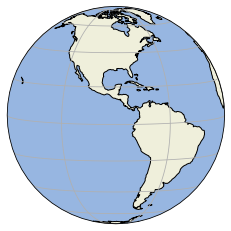

In [74]:
import matplotlib.pyplot as plt
import numpy as np

import cartopy
import cartopy.crs as ccrs


# def sample_data(shape=(20, 30)):
#     """
#     Returns ``(x, y, u, v, crs)`` of some vector data
#     computed mathematically. The returned crs will be a rotated
#     pole CRS, meaning that the vectors will be unevenly spaced in
#     regular PlateCarree space.

#     """
#     crs = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)

#     x = np.linspace(311.9, 391.1, shape[1])
#     y = np.linspace(-23.6, 24.8, shape[0])

#     x2d, y2d = np.meshgrid(x, y)
#     u = 10 * (2 * np.cos(2 * np.deg2rad(x2d) + 3 * np.deg2rad(y2d + 30)) ** 2)
#     v = 20 * np.cos(6 * np.deg2rad(x2d))

#     return x, y, u, v, crs


def main():
    ax = plt.axes(projection=ccrs.Orthographic(-90, 5))

    ax.add_feature(cartopy.feature.OCEAN, zorder=0)
    ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
    ax.set_global()
    ax.gridlines()

#     x, y, u, v, vector_crs = sample_data()
#     ax.quiver(x, y, u, v, transform=vector_crs)

    plt.show()


if __name__ == '__main__':
    main()
    


In [79]:
#  The first step is to get hold of the shapefile, and the respective geometries:
feature = cartopy.feature.NaturalEarthFeature('physical', 'coastline', '110m')
geoms = feature.geometries()

# Next, we can convert these to the desired projection:
target_projection = ccrs.PlateCarree()
geoms = [target_projection.project_geometry(geom, feature.crs)
         for geom in geoms]


# Since these are shapely geometries, we then want to convert them to matplotlib paths with:

from cartopy.mpl.patch import geos_to_path
import itertools

paths = list(itertools.chain.from_iterable(geos_to_path(geom)
                                             for geom in geoms))

# With paths, we should be able to just create a PathCollection 
# in matplotlib, and add it to the axes, but sadly, Axes3D doesn't 
# seem to cope with PathCollection instances, so we need to 
# workaround this by constructing a LineCollection (as basemap does).
# Sadly LineCollections don't take paths, but segments, which we 
# can compute with:

segments = []
for path in paths:
    vertices = [vertex for vertex, _ in path.iter_segments()]
    vertices = np.asarray(vertices)
    segments.append(vertices)

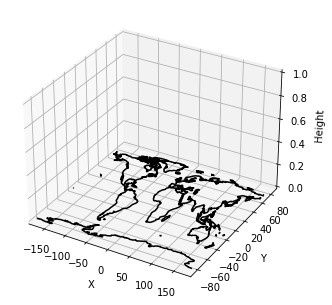

In [80]:
# Pulling this all together, we end up with a similar 
# result to the basemap plot which your code produces:

import itertools

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np

import cartopy.feature
from cartopy.mpl.patch import geos_to_path
import cartopy.crs as ccrs


fig = plt.figure()
ax = Axes3D(fig, xlim=[-180, 180], ylim=[-90, 90])
ax.set_zlim(bottom=0)


target_projection = ccrs.PlateCarree()

feature = cartopy.feature.NaturalEarthFeature('physical', 'coastline', '110m')
geoms = feature.geometries()

geoms = [target_projection.project_geometry(geom, feature.crs)
         for geom in geoms]

paths = list(itertools.chain.from_iterable(geos_to_path(geom) for geom in geoms))

# At this point, we start working around mpl3d's slightly broken interfaces.
# So we produce a LineCollection rather than a PathCollection.
segments = []
for path in paths:
    vertices = [vertex for vertex, _ in path.iter_segments()]
    vertices = np.asarray(vertices)
    segments.append(vertices)

lc = LineCollection(segments, color='black')

ax.add_collection3d(lc)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Height')

plt.show()


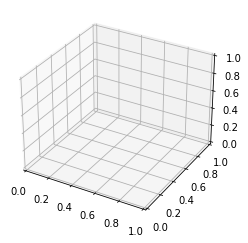

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("Invalid element.")? (<ipython-input-93-f51541b88caa>, line 50)

In [22]:
import mpl_toolkits.basemap

map = Basemap() 


ImportError: cannot import name 'dedent' from 'matplotlib.cbook' (/data/miniconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py)

In [ ]:
cc_lons, cc_lats=get_coastline_traces(map)
country_lons, country_lats=get_country_traces(map)

#concatenate the lon/lat for coastlines and country boundaries:
lons=cc_lons+[None]+country_lons
lats=cc_lats+[None]+country_lats

xs, ys, zs=mapping_map_to_sphere(lons, lats, radius=1.01)# here the radius is slightly greater than 1 
                                                         #to ensure lines visibility; otherwise (with radius=1)
                                                         # some lines are hidden by contours colors
        
boundaries=dict(type='scatter3d',
               x=xs,
               y=ys,
               z=zs,
               mode='lines',
               line=dict(color='black', width=1)
                )

In [17]:
# Take lat, lon from field
clons=np.array(lon.tolist()+[180], dtype=np.float64)
clats=np.array(lat, dtype=np.float64)
# Create a meshgrid from lats and lons
clons, clats=np.meshgrid(clons, clats)

# Project our (lat,lon,z) to our sphere
XS, YS, ZS=mapping_map_to_sphere(clons, clats)

# generate values for the field Z
# Wrap over longitudes
nrows, ncolumns=clons.shape
VALUES=np.zeros(clons.shape, dtype=np.float64)
VALUES[:, :ncolumns-1]=np.copy(np.array(z,  dtype=np.float64))
VALUES[:, ncolumns-1]=np.copy(z[:, 0])

# Create a sphere: colors are taken from our field Z that was mapped to our sphere(VALUES)
sphere=dict(type='surface',
            x=XS, 
            y=YS, 
            z=ZS,
            colorscale='Jet',
            surfacecolor=VALUES,
            cmin=vmin, 
            cmax=vmax,
            colorbar=dict(thickness=20, len=0.75, ticklen=4, title= 'Z'),
            hoverinfo='text')


NameError: name 'lon' is not defined

In [16]:
# Turn off all axis
noaxis=dict(showbackground=False,
            showgrid=False,
            showline=False,
            showticklabels=False,
            ticks='',
            title='',
            zeroline=False)

# Define layout i.e. title, figure size, axis (x, y, z), camera, etc.
layout3d=dict(title='Z<br>Depth '+ str(getint(filename)) + 'm',
              font=dict(family='Balto', size=14),
              width=700, 
              height=700,
              scene=dict(xaxis=noaxis, 
                         yaxis=noaxis, 
                         zaxis=noaxis,
                         aspectratio=dict(x=1,
                                          y=1,
                                          z=1),
                         camera=dict(eye=dict(x=1.15, 
                                     y=1.15, 
                                     z=1.15)
                                    )
            ),
            paper_bgcolor='rgba(255,255,255, 1.0)'  
           )

fig=dict(data=[sphere, boundaries], layout=layout3d)
py.iplot(fig, filename='z-map2sphere')

NameError: name 'filename' is not defined

ModuleNotFoundError: No module named 'ipyvolume'